##Normalizar uma matriz de

Vamos estudar agora o Capitulo 7 para isso. Página 288/256

Nome: Matheus Rodrigues da Silva Espalaor

In [15]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

O código de baixo foi retirado do Cap7Eingen.ipynb

In [49]:
#Aqui, vamos criar uma matriz de dados em uma distribuição normal
class GaussianData():
  def __init__(self, mean, cov, num_samples):
    self.mean = mean
    self.cov = cov
    self.num_samples = num_samples
    self.pts = None

  def create_data(self):
    self.pts = np.random.multivariate_normal(self.mean, self.cov, self.num_samples)

  def get_cov(self, pts):
    return np.cov(pts.T)

  def get_mean(self, pts):
    return np.mean(pts, axis=0)

  def get_angle(self, eigvecs):
    return np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

  def get_eig(self, pts):
    return np.linalg.eigh(self.get_cov(pts))

  def get_width_height(self, eigvals):
    return 2 * np.sqrt(eigvals)

  def plot_gaussian_ellipse(self, Normalized=False, pts=None):
    if (Normalized==False):
      pts = self.pts

    eigvals, eigvecs = self.get_eig(pts)
    width, height = self.get_width_height(eigvals)
    angle = self.get_angle(eigvecs)

    fig, ax = plt.subplots()

    ellipse = Ellipse(xy=self.get_mean(pts),
                    width=width, height=height,
                    angle=angle, edgecolor='red', fc='None', lw=2)


    ax.add_patch(ellipse)
    ax.scatter(pts[:, 0], pts[:, 1], alpha=0.2)

    origin = self.get_mean(pts)  # A origem das setas é a média dos dados

  # Cada seta é um autovetor multiplicado pela raiz quadrada dos autovalores (variância)
    for i in range(len(eigvals)):
        # Definir a direção e o tamanho das setas (escala pelos autovalores)
        eigval = np.sqrt(eigvals[i])
        eigvec = eigvecs[:, i]

        # Usar quiver para desenhar as setas
        ax.quiver(origin[0], origin[1], eigvec[0]*eigval, eigvec[1]*eigval,
                  angles='xy', scale_units='xy', scale=1,
                  color='blue', width=0.005, headwidth=3, headlength=5)

        # Desenhar as setas na direção oposta também (visualização simétrica)
        ax.quiver(origin[0], origin[1], -eigvec[0]*eigval, -eigvec[1]*eigval,
                  angles='xy', scale_units='xy', scale=1,
                  color='blue', width=0.005, headwidth=3, headlength=5)

    # Ajustar os limites do gráfico
    #ax.set_xlim(np.min(pts[:, 0]) - 1, np.max(pts[:, 0]) + 1)
    #ax.set_ylim(np.min(pts[:, 1]) - 1, np.max(pts[:, 1]) + 1)
    ax.set_aspect('equal', adjustable='box')  # Forçar o aspecto igual

    # Mostrar o gráfico
    plt.title('Elipse da Matriz de Distribuição Normal')
    plt.grid(True)

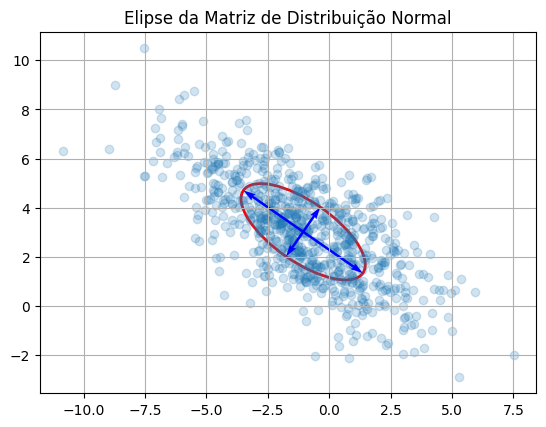

In [50]:
cov = np.array([[6, -3], [-3, 3.5]])
mean = np.array([-1, 3])
gauss = GaussianData(cov=cov, mean=mean, num_samples=800)
gauss.create_data()
gauss.plot_gaussian_ellipse()
plt.show()

In [51]:
#Vamos normalizar a matriz.
#Como estamos seguindo uma distribuição galssiana, temos que subtrair a media, e dividir pelo desvio padrão. Assim, normalizamos.

class NormilizedGauss(GaussianData):
  def __init__(self, mean, cov, num_samples):
    super().__init__(mean, cov, num_samples)

  def normalize(self):
    return (self.pts - np.mean(self.pts, axis=0)) / np.std(self.pts)


  def plot(self):
    self.plot_gaussian_ellipse()
    self.plot_gaussian_ellipse(True, self.normalize())

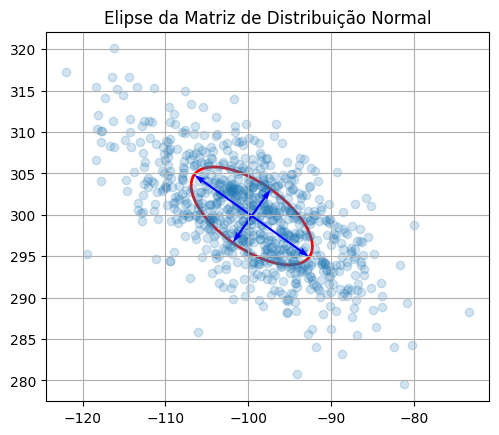

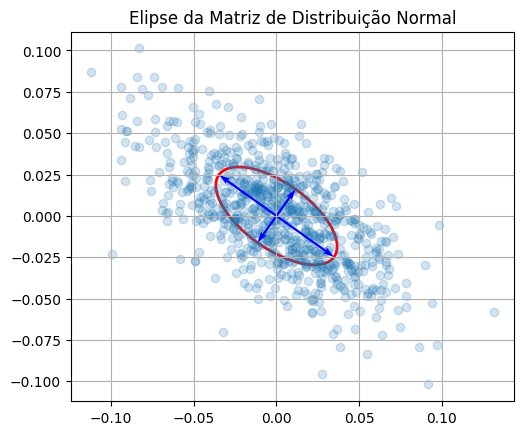

In [52]:
cov = np.array([[6, -3], [-3, 3.5]])*10
mean = np.array([-1, 3])*100

normalized = NormilizedGauss(mean, cov, 800)
normalized.create_data()
normalized.plot()

Aqui temos os valores normalizados. Isso nos ajudará muito quando estivermos mexendo com deep learning
